In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Load the Iris dataset
df = pd.read_csv("../data/iris.data")

# Extract the features matrix
X = df.iloc[:, [2, 3]].values

# Extract the class labels
y = df.iloc[:, 4].values

# Convert class labels to three integers
y = np.where(y == "Iris-setosa", 0, np.where(y == "Iris-versicolor", 1, 2))

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Initialize the StandardScaler
sc = StandardScaler()

# Standardize the features
sc.fit(X_train)

# Apply the scaler to the training set
X_train_std = sc.transform(X_train)

# Initialize the Logistic Regression model
# In the solver parameter, we can use "newton-cg", "lbfgs", "liblinear", "sag" and "saga"
lr = LogisticRegression(C=100.0, solver="lbfgs", multi_class="ovr")

# Fit the model
lr.fit(X_train_std, y_train)

LogisticRegression(C=100.0, multi_class='ovr')

In [19]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=f'Class {cl}', edgecolor='black')

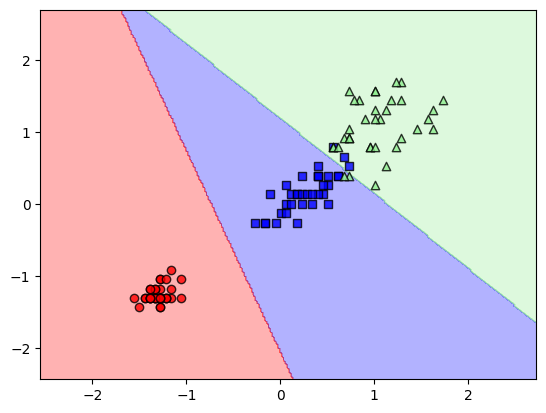

In [20]:
plot_decision_regions(X=X_train_std, y=y_train, classifier=lr)

In [21]:
X_test_std = sc.transform(X_test)

lr.predict_proba(X_test_std[:3, :])

array([[3.88198890e-09, 1.46859501e-01, 8.53140495e-01],
       [8.34485694e-01, 1.65514306e-01, 3.26990910e-13],
       [8.49251084e-01, 1.50748916e-01, 2.63333387e-14]])

In [22]:
lr.predict_proba(X_test_std[:3, :]).sum(axis=1)

array([1., 1., 1.])

In [23]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0], dtype=int64)

In [24]:
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

In [25]:
lr.predict(X_test_std[0, :].reshape(1, -1))

array([2])

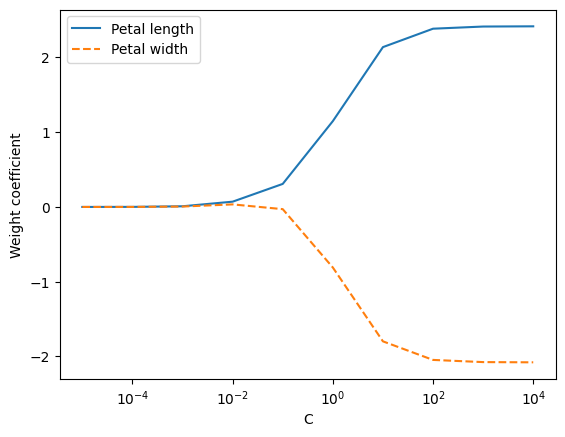

In [ ]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, multi_class='ovr')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)
weights = np.array(weights)
plt.plot(params, weights[:, 0], label='Petal length')
plt.plot(params, weights[:, 1], linestyle='--', label='Petal width')
plt.ylabel('Weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()